# 목차

- 1. 변수명 자동화, 변수는 string이 아니기 때문에 global함수를 이용해서 자동으로 만들게 해야한다
- 2. 결측치 확인 데이터프레임
- 3. 쉼표로 나누고, 공백 제거하고, 중복요소 제거
- 4. 폴더 생성 함수
- 5. csv파일 저장
- 6. txt 파일 읽어오기
- 7. 리스트 빈 문자열 제거2
- 8. 계단형 상관계수 히트맵 그리기
- 9. 시계열 데이터 컬럼 만들어주기
- 10. 판다스에서 열, 행 이름 안 잘리고 전부 보이게 하기
- 11. glob 사용법
- 12. 리스트 요소별 개수 파악

# 데이터 불러오기

In [9]:
import pandas as pd
titanic = pd.read_csv('titanic.csv')

### 1. 변수명 자동화, 변수는 string이 아니기 때문에 global함수를 이용해서 자동으로 만들게 해야한다

In [10]:
for i in range(5):
    globals()["test{}".format(i)] = i
print(test0, test1, test2, test3, test4)

0 1 2 3 4


### 2. 결측치 확인 데이터프레임

In [11]:
data = titanic

train_nan = list(data.isna().sum())
num_nan = list(filter(lambda x:x >= 1, train_nan)) # nan값이 1개 이상인 친구만 보여줌

index_nan = list(filter(lambda e:train_nan[e] >= 1, range(len(train_nan)))) # 이건 인덱스

nan_df = pd.DataFrame({'index_in_train' : index_nan, 'column_name' : data.iloc[:, index_nan].columns, 'NAN_number' : num_nan})
display(nan_df)

,index_in_train,column_name,NAN_number
0,5,Age,177
1,10,Cabin,687
2,11,Embarked,2


### 3. 쉼표로 나누고, 공백 제거하고, 중복요소 제거

In [12]:
tmp = ['테스트1, 테스  트2', '   테스트2, 테스트3', '테스트3 , 테스트4, 테스트5  ']
result = []

for i in tmp:
    result += (i.split(","))
    
result2 = []
for i in result:
    result2.append(i.replace(" ", ""))
    
result2 = set(result2)
result2 = list(result2)
len(result2)

result2.sort()
print(result2)

['테스트1', '테스트2', '테스트3', '테스트4', '테스트5']


### 4. 폴더 생성 함수

In [13]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

### 5. csv파일 저장

In [14]:
import csv

ROOT_PATH = "folder_for_test//5_csv_test"

createFolder(ROOT_PATH)

with open(ROOT_PATH + '//csv_test.csv','w',newline='') as f: # w = 내용을 덮어 씀, r = 파일을 읽기만 함, a = 파일의 마지막에 새로운 내용을 추가함 (기존내용 삭제 X)
    writer = csv.writer(f)
    writer.writerow(data)

### 6. txt 파일 읽어오기

In [17]:
txt_test_list = []
txt_test_list2 = []

ROOT_PATH = "folder_for_test//6_txt_test"

f = open(ROOT_PATH + '//test.txt', 'r', encoding='UTF8')
while True:
    line = f.readline() # readline = 한 줄씩 읽어옴, readlines = 모든 각각의 줄을 읽어서 리스트에 넣음, read  = 파일 내용 전체를 문자열로 리턴
    txt_test_list.append(line)
    if not line: break;
f.close()

for i in txt_test_list:
    txt_test_list2.append(i.strip()) # strip이란 함수가 있음 신기방기
    # txt_test_list2.append(i.replace('\n', '')) # 리스트에서 같이 나온 \n을 제거
    
txt_test_list3 = [v for v in txt_test_list2 if v] # 리스트 빈 문자열 제거 ex) ['', '', ''] 이런거
print(txt_test_list3)

['우1', '현2', '히3', '히4', '히5', '히6', '히7', '히8']


### 7. 리스트 빈 문자열 제거2

In [ ]:
txt_test_list3_1 = ' '.join(txt_test_list2).split()
txt_test_list3_1

['우1', '히2', '히3', '히4', '히5', '히6', '히7', '히8']

### 8. 계단형 상관계수 히트맵 그리기

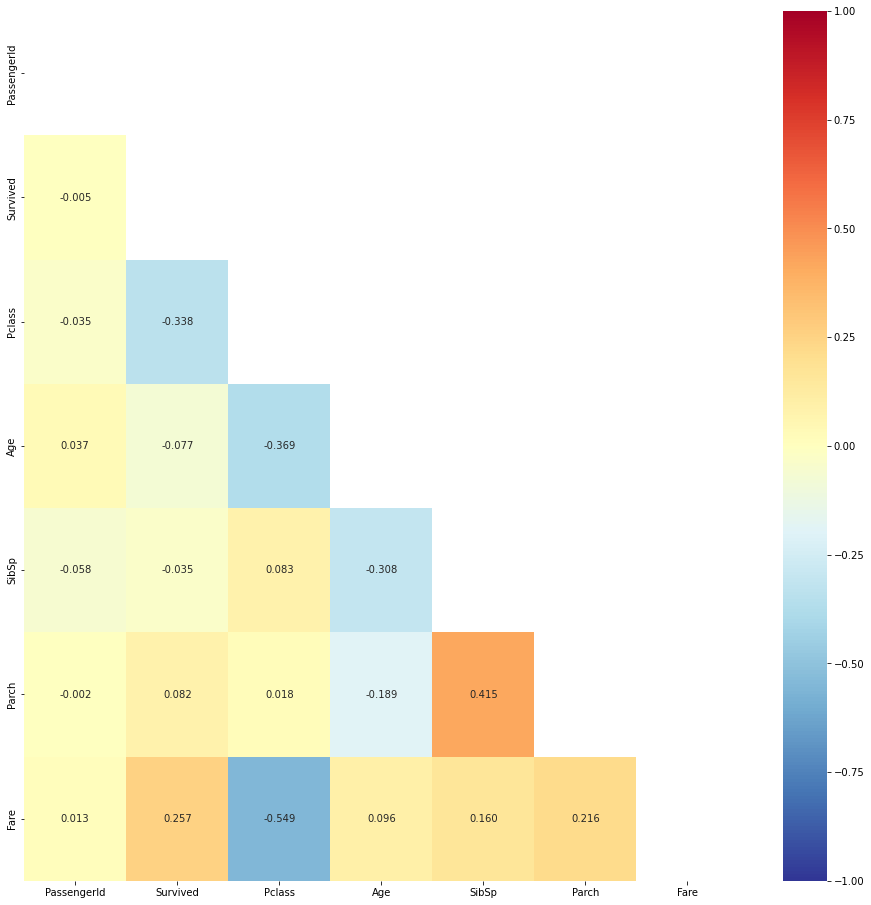

In [ ]:
# df.drop('date', axis = 1) # 드랍할 컬럼
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

df = titanic

plt.figure(figsize = (16, 16))
mask = np.zeros_like(df.corr(), dtype=np.bool) # corr을 다른 것으로 바꾸면 다른 상관계수 그래프를 그릴 수도 있음
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

### 9. 시계열 데이터 컬럼 만들어주기

In [ ]:
test_data_1 = pd.DataFrame({'집계일자' : ['20210919', '20210919','20210919','20210919','20210919','20210919'], \
                            '집계시' : ['8', '9', '10', '11', '12', '13']})

display(test_data_1, "위의 df가 아래처럼 변함")

all_2017_copy1 = test_data_1.copy()

for i in range(all_2017_copy1['집계일자'].shape[0]):
    result1 = str(all_2017_copy1['집계일자'][i])[:4]
    result2 = result1 + '-'
    result3 = result2 + str(all_2017_copy1['집계일자'][i])[4:6]
    result4 = result3 + '-'
    result5 = result4 + str(all_2017_copy1['집계일자'][i])[-2:]
    all_2017_copy1.loc[i, '집계일자'] = result5
a = []
for n in range(all_2017_copy1['집계시'].shape[0]):
    
    result1 = int(all_2017_copy1['집계시'][n])
    if result1 < 10:
        result2 = ' 0' + str(result1) + ':00:00'
    else:
        result2 = ' ' + str(result1) + ':00:00'
    alll = all_2017_copy1.loc[n, '집계일자'] + result2
    all_2017_copy1.iloc[n, 0] = alll

all_2017_copy1['집계일자'] = pd.to_datetime(all_2017_copy1['집계일자'])

test_data_finish = all_2017_copy1.copy()

display(test_data_finish) #  all_2017_copy1.info())
# all_2017_copy1.to_csv('all_2021_date.csv')

,집계일자,집계시
0,20210919,8
1,20210919,9
2,20210919,10
3,20210919,11
4,20210919,12
5,20210919,13


'위의 df가 아래처럼 변함'

,집계일자,집계시
0,2021-09-19 08:00:00,8
1,2021-09-19 09:00:00,9
2,2021-09-19 10:00:00,10
3,2021-09-19 11:00:00,11
4,2021-09-19 12:00:00,12
5,2021-09-19 13:00:00,13


### 10. 판다스에서 열, 행 이름 안 잘리고 전부 보이게 하기

In [ ]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### 11. glob 사용법

In [ ]:
import glob

output = glob.glob('folder_for_test\\6_txt_test\\*.txt')
output

['folder_for_test\\6_txt_test\\test.txt',
 'folder_for_test\\6_txt_test\\test2.txt']

### 12. 리스트 요소별 개수 파악

In [ ]:
def countelem(word): # from collections import Counter -->  Counter([1, 2, 3, 3])을 사용해도 됨
    counter = {}
    for letter in word:
        if letter not in counter:
            counter[letter] = 0
        counter[letter] += 1
    return counter

print(countelem([1, 2, 3, 3]), countelem('test1'))

{1: 1, 2: 1, 3: 2} {'t': 2, 'e': 1, 's': 1, '1': 1}


In [ ]:
def find_max(word):
    counter = countelem(word) # 여기서 위의 함수가 들어감
    max_count = -1
    for letter in counter:
        if counter[letter] > max_count:
            max_count = counter[letter]
            max_letter = letter
    return max_letter, max_count

print(find_max('hello world'), find_max([1, 2, 3, 3]))

('l', 3) (3, 2)
